In [2]:
%load_ext autoreload
%autoreload 2

In [1]:
from importlib.resources import files

import pandas as pd
import seaborn as sns
sns.set()

DATA_DIR = files("biobank_olink.data")

In [2]:
cov_df = pd.read_csv(DATA_DIR / "BP_cov.zip", sep="\t", index_col="eid")
cat_cols = ["Sex", "Smokinstatus", "HTNgroup"]
reg_cols = list(cov_df.columns.difference(cat_cols))
print(f"Original cov shape: {cov_df.shape}")
ol_df = pd.read_csv(DATA_DIR / "olink_data_ins0.csv", index_col=0)
print(f"Original ol shape: {ol_df.shape}")
eids = cov_df.index.intersection(ol_df.index)
cov_df = cov_df.loc[eids]
print(f"New cov shape: {cov_df.shape}")
ol_df = ol_df.loc[cov_df.index]
print(f"New ol shape: {ol_df.shape}")

Original cov shape: (409519, 10)
Original ol shape: (52704, 1463)
New cov shape: (43509, 10)
New ol shape: (43509, 1463)


In [4]:
pd.read_csv(DATA_DIR / "unrelated.zip", sep="\t", index_col="eid").value_counts()

p22020
Yes       337391
           72128
Name: count, dtype: int64

In [3]:
import numpy as np
cov_df[cov_df == " "] = np.nan
cov_df[cov_df.HTNgroup == 4] = np.nan
replace_comma_with_dot_if_str = lambda x: x.replace(",", ".") if isinstance(x, str) else x
cols = ["BMI", "SBP", "DBP", "PP"]
cov_df[cols] = cov_df[cols].applymap(replace_comma_with_dot_if_str)
cov_df = cov_df.astype(float)

In [ ]:
import matplotlib.pyplot as plt
def plot_histograms(df):
    grid_size = int(np.ceil(np.sqrt(len(df.columns))))

    plt.figure(figsize=(6 * grid_size, 6 * grid_size))

    for index, column in enumerate(df.columns):
        plt.subplot(grid_size, grid_size, index + 1)
        sns.histplot(data=df, x=column, kde=False, bins=30, hue=cov_df.Sex.values.astype(str))
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.savefig(DATA_DIR / f"figs/histograms_{i}_{i + 100}.png")

for i in range(0, len(ol_df.columns), 100):
    plot_histograms(ol_df.iloc[:, i:i + 100])

In [5]:
cov_df.HTNgroup.value_counts()

HTNgroup
0.0    17874
1.0    12865
2.0     9722
4.0      259
Name: count, dtype: int64

In [6]:
cov_df

,Sex,age,BMI,Smokinstatus,Alcoholintakefrequency,HTNgroup,fastingtime,SBP,DBP,PP
eid,,,,,,,,,,
1000011,1.0,60.0,28.0557,0.0,6.0,2.0,4.0,157.5,98.5,59.0
1000121,1.0,63.0,34.1438,0.0,1.0,2.0,3.0,149.0,97.5,51.5
1000366,1.0,66.0,23.7966,1.0,2.0,0.0,2.0,136.5,82.5,54.0
1000774,0.0,57.0,23.6146,0.0,2.0,0.0,2.0,135.0,72.5,62.5
1000807,0.0,63.0,26.0062,1.0,1.0,2.0,6.0,122.5,82.0,40.5
...,...,...,...,...,...,...,...,...,...,...
6023200,1.0,62.0,24.3757,1.0,1.0,0.0,2.0,111.5,59.0,52.5
6023252,1.0,61.0,31.6184,2.0,1.0,0.0,4.0,137.5,75.0,62.5
6023293,1.0,69.0,23.4375,0.0,3.0,0.0,3.0,133.0,85.5,47.5


/home/prenc/.miniconda3/envs/biobank_olink/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


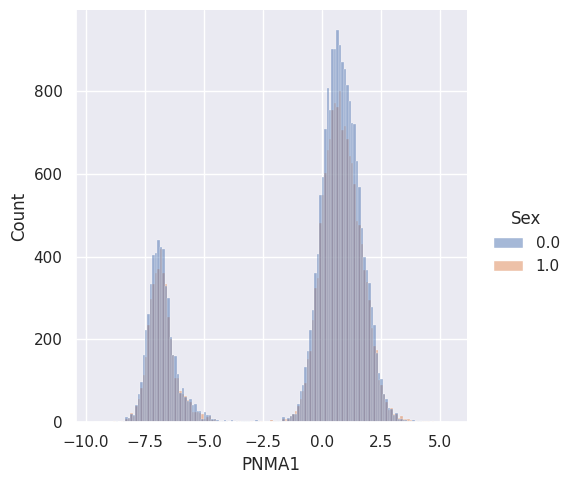

In [7]:
sns.displot(data=ol_df, x="PNMA1", hue=cov_df.Sex)

In [ ]:
correlation_matrix = np.corrcoef(ol_df, rowvar=True)
sns.clustermap(correlation_matrix, annot=True, cmap="coolwarm")

In [ ]:
corr = np.corrcoef(ol_df, rowvar=False)
np.fill_diagonal(corr, 0)
corr = pd.DataFrame(corr, index=ol_df.columns, columns=ol_df.columns)
corr.head()

In [ ]:
max_corrs = corr.max().sort_values(ascending=False).values
max_corrs[max_corrs > 0.9]